In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

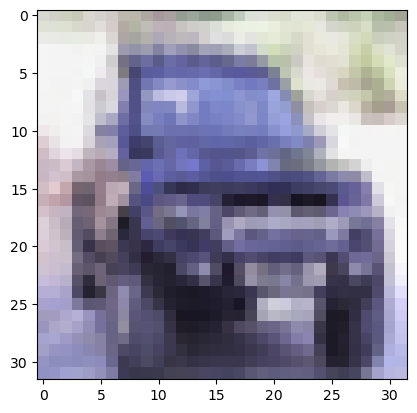

In [8]:
plt.imshow(X_test[9])

In [11]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(cifar_labels[y[index]])
    

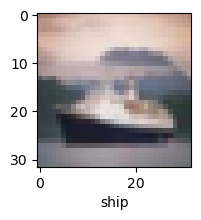

In [14]:
plot_sample(X_train, y_train, 888)

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Flatten(name='flatten_input'),  
    
    tf.keras.layers.Dense(64, activation='relu', name='hidden1'),  
    
    tf.keras.layers.Dense(10, activation='relu', name='hidden2'),
    
    tf.keras.layers.Dense(10, activation='softmax', name='last'),  
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 152s 93ms/step - loss: 1.6998 - accuracy: 0.3844
Epoch 2/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.2932 - accuracy: 0.5424
Epoch 3/10
1563/1563 [==============================] - 146s 93ms/step - loss: 1.1408 - accuracy: 0.6011
Epoch 4/10
1563/1563 [==============================] - 146s 93ms/step - loss: 1.0416 - accuracy: 0.6373
Epoch 5/10
 859/1563 [===============>..............] - ETA: 1:09 - loss: 0.9746 - accuracy: 0.6624

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


print(classification_report(y_test, y_pred_classes))

In [ ]:
y_pred_classes[: 15]

In [ ]:
y_test[:15].reshape(-1,)